In [24]:
import requests
import json
import re
from lxml import etree
import time
import csv
import pandas as pd
import random
import os

In [25]:
#选择30个用于爬虫的网站
webs = [
    "https://movie.douban.com/subject/25728006/comments?", 
    "https://movie.douban.com/subject/26260853/comments?", 
    "https://movie.douban.com/subject/4286017/comments?", 
    "https://movie.douban.com/subject/27163278/comments?",
    "https://movie.douban.com/subject/6537500/comments?", 
    "https://movie.douban.com/subject/1307442/comments?",
    "https://movie.douban.com/subject/2132930/comments?",
    "https://movie.douban.com/subject/35267208/comments?",
    "https://movie.douban.com/subject/1292052/comments?",
    "https://movie.douban.com/subject/1292722/comments?",
    "https://movie.douban.com/subject/26752088/comments?",
    "https://movie.douban.com/subject/1291561/comments?",
    "https://movie.douban.com/subject/1295644/comments?",
    "https://movie.douban.com/subject/25662329/comments?",
    "https://movie.douban.com/subject/1292720/comments?",
    "https://movie.douban.com/subject/1291546/comments?",
    "https://movie.douban.com/subject/34941536/comments?",
    "https://movie.douban.com/subject/1889243/comments?",
    "https://movie.douban.com/subject/20495023/comments?",
    "https://movie.douban.com/subject/26794435/comments?",
    "https://movie.douban.com/subject/27060077/comments?",
    "https://movie.douban.com/subject/1292064/comments?",
    "https://movie.douban.com/subject/3319755/comments?",
    "https://movie.douban.com/subject/3541415/comments?",
    "https://movie.douban.com/subject/26387939/comments?",
    "https://movie.douban.com/subject/3742360/comments?",
    "https://movie.douban.com/subject/3793023/comments?",
    "https://movie.douban.com/subject/26683290/comments?",
    "https://movie.douban.com/subject/1292001/comments?",
    "https://movie.douban.com/subject/7065154/comments?",
]

In [3]:
#清空csv文件
file_path = ".\pinglun.csv"

if os.path.isfile(file_path):
    with open(file_path, "w") as f:
        f.truncate()

In [67]:
#爬取用户对于电影的评论和星星数，并将数据存入csv文件
def crawler(url):
    for number in range(11):
        num = number * 20
        start = str(num)
        url = url
#         url = "https://movie.douban.com/subject/23761370/comments?"
#         url = "https://movie.douban.com/subject/1418200/comments?"
        param = {
            "percent_type": "",
            "start": start,
            "limit": "20",
            "status": "P",
            "sort": "new_score",
            "comments_only": "1"
        }
        headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.107 Safari/537.36 Edg/92.0.902.55'}

        try:
            res_text = requests.get(url=url, params=param, headers=headers).text
            res_html = json.loads(res_text)["html"]
            star = re.findall("allstar..", res_html)
            comments = etree.HTML(res_html).xpath("//span[contains(@class, 'short')]/text()")
        except json.JSONDecodeError:
            print("JSONDecodeError: Skipping URL {}".format(number))
            continue
    
#         res_text = requests.get(url=url, params=param, headers=headers).text
#         res_html = json.loads(res_text)["html"]
#         star = re.findall("allstar..", res_html)
#         comments = etree.HTML(res_html).xpath("//span[contains(@class, 'short')]/text()")
    
        table = [0] * len(star)
        for i in range(len(star)):
            star[i] = star[i][-2:-1]
            if int(star[i]) >= 4:
                table[i] = 1
            else:
                table[i] = 0
            
    
        if len(star)==len(comments):
            zipped = zip(star, comments, table)
            result = list(zipped)

            if os.path.getsize(".\pinglun.csv"):
                header = ('star','comment','table')
                df = pd.DataFrame(result)
                df.to_csv('.\pinglun.csv',mode='w', header=header, index=False, quoting=csv.QUOTE_ALL, encoding='utf_8_sig')
        
            else:
                f = pd.DataFrame(result)
                df.to_csv('.\pinglun.csv',mode='a', header=False, index=False, quoting=csv.QUOTE_ALL, encoding='utf_8_sig')
        
#             df = pd.DataFrame(result)
#             df.to_csv('.\comment.csv',mode='a', header=False, index=False, quoting=csv.QUOTE_ALL, encoding='utf_8_sig')
        
#             if number == 0:
#                 header = ('star','comment','table')
#                 df = pd.DataFrame(result)
#                 df.to_csv('.\pinglun.csv',mode='a', header=header, index=False, quoting=csv.QUOTE_ALL, encoding='utf_8_sig')
#                 df.to_csv('.\pinglun.csv',mode='w', header=header, index=False, quoting=csv.QUOTE_ALL, encoding='utf_8_sig')
#             else:
#                 df = pd.DataFrame(result)
#                 df.to_csv('.\pinglun.csv',mode='a', header=False, index=False, quoting=csv.QUOTE_ALL, encoding='utf_8_sig')
                
#         if number == 0:
#             with open(".\pinglun.csv", mode = "w",newline='')as file:
#                 writer = csv.writer(file)
#                 for row in result:
#                     writer.writerow(row)
#         else:
#             with open(".\pinglun.csv", mode = "a",newline='')as file:
#                 writer = csv.writer(file)
#                 for row in result:
#                     writer.writerow(row)
            
            print("done",number)
    
        t = random.randint(1, 6)   
        time.sleep(t)
    

In [1]:
#爬取数据
for web in webs:
    crawler(web)

In [4]:
# 去除中文停用词
def drop_stop_words(st_path, word_list):

    with open(st_path, 'r') as f:
        st = f.read()
        st_list = st.splitlines()

    for stop_word in st_list:
        word_list = [word for word in word_list if word != stop_word]
    return word_list

In [5]:
#除去非中文的特殊符号
def drop_non_chinese(text):
    pattern = re.compile(r'[^\u4e00-\u9fa5]')
    chinese_text = re.sub(pattern, '', text)
    return chinese_text

In [95]:
#分词并统计词频
import jieba

file_path_1 = ".\pinglun.txt"
txt = open(".\pinglun.txt","r",encoding = "gbk").read()

words = drop_non_chinese(txt)
words = jieba.lcut(words)
words = drop_stop_words(r'D:\Loaddownbag\nlp\sentiment\data\stop_words.txt', words)

counts = {}
for word in words:
    if len(word) == 1:
        continue
    else:
        counts[word] = counts.get(word, 0) + 1
items = list(counts.items())
items.sort(key = lambda x:x[1], reverse = True)
            

In [96]:
for i in range(50,100):
    word, count = items[i]
    print("{0},{1}".format(word,count))

动画,106
每个,105
应该,104
看过,104
特别,103
激情,103
时间,102
结尾,101
情节,101
作品,100
音乐,100
自由,100
一次,99
一起,99
美国,98
煽情,98
主角,97
意义,96
画面,96
真正,96
一定,95
美好,95
成为,94
速度,94
无法,93
情感,93
社会,92
阿甘,91
叙事,90
女儿,90
生命,90
楚门,90
成功,89
设定,89
之后,88
真实,88
电影院,88
地球,87
诺兰,87
存在,86
特效,86
一点,85
主题,84
地方,84
一些,84
演员,83
实在,82
飙车,82
变成,82
东西,82


In [105]:
#绘制词云
# import wordcloud

# tf = " ".join(words)
# w = wordcloud.WordCloud(width = 1000, height = 800, background_color = "white",font_path = "STCAIYUN.TTF", max_words = 50)
# w.generate(tf)
# w.to_file("pinglun.png")

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import re
import jieba
import gensim
from sklearn.model_selection import train_test_split
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import confusion_matrix

C:\Users\lenovo\AppData\Local\Temp\ipykernel_19544\1444427880.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['star'], bins=5, kde=False, norm_hist=True)


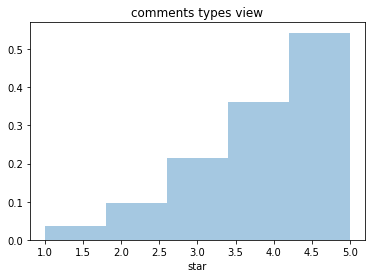

正面评价: 3196，占评论总数的72.32%    负面评价: 1223, 占总数的27.68%


In [2]:
#查看评论类型占比
data = pd.read_csv(r'pinglun.csv', encoding='gbk')
positive = len(data['table'][data['table'] == 1])
negative = len(data['table'][data['table'] == 0])
total = positive + negative
sns.distplot(data['star'], bins=5, kde=False, norm_hist=True)
plt.title('comments types view')
plt.show()
print("正面评价: %d，占评论总数的%.2f%%    负面评价: %d, 占总数的%.2f%%" %(positive, (positive/total*100), negative, (negative/total*100)))

In [3]:
# 中文分词
def split_text(chinese_text, cut_all=False):

    text_generater = jieba.cut(chinese_text, cut_all=cut_all)
    result = ' '.join(text_generater)
    return result

# 去除中文停用词
def drop_stop_words_1(st_path, chinese_text):

    with open(st_path, 'r') as f:
        sw = f.read()
        sw_list = sw.splitlines()
    word_list = chinese_text.split()

    for stop_word in sw_list:
        word_list = [word for word in word_list if word != stop_word]
    return word_list

#除去非中文的特殊符号
def drop_non_chinese(text):
    pattern = re.compile(r'[^\u4e00-\u9fa5]')
    chinese_text = re.sub(pattern, '', text)
    return chinese_text

In [4]:
X = data['comment']
Y = data['table']

In [5]:
X = X.apply(lambda x: drop_non_chinese(str(x)))
X = X.apply(lambda x: split_text(x))
X = X.apply(lambda x: drop_stop_words_1(r'stop_words.txt', x))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\lenovo\AppData\Local\Temp\jieba.cache
Loading model cost 0.513 seconds.
Prefix dict has been built successfully.


In [6]:
def train_Word2Vec_model(text, save_path):
    model = gensim.models.Word2Vec(text, min_count=1, window=5)
    model.save(save_path)
    return model

def word_to_dict(X, word_vec_model):
    total_set = set()
    word_to_vec = dict()
    word_to_index = dict()

    for x in X:
        total_set = set.union(total_set, set(x))
    index = 1
    for i in total_set:
        word_to_vec[i] = word_vec_model[i]
        word_to_index[i] = index
        index += 1

    return word_to_vec, word_to_index

In [7]:
# 训练Word2Vec词向量模型与构建映射
word_vec_model = train_Word2Vec_model(X, r'word2vec.model')
word_to_vec, word_to_index = word_to_dict(X, word_vec_model.wv)

In [8]:
# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(Y), test_size=0.2, random_state=2)

In [9]:
def text_to_index(X, word_to_index, max_len=100):
    m = X.shape[0]
    X_indices = np.zeros((m, max_len))

    for i in range(m):
        j = 0
        for word in X[i][:max_len]:
            try:
                X_indices[i, j] = word_to_index[word]
                j += 1
            except KeyError:
                pass

    return X_indices

In [10]:
# word_to_index
# word_to_vec

In [11]:
# 构建Embedding层
def pretrained_embedding_layer(word_to_vec, word_to_index):
    
    vocab_len = len(word_to_index) + 1 
    emb_dim = word_to_vec['电影'].shape[0]

    emb_matrix = np.zeros((vocab_len, emb_dim))
    for word, index in word_to_index.items():
        emb_matrix[index, :] = word_to_vec[word]

    weight = torch.from_numpy(emb_matrix)
    embedding = nn.Embedding.from_pretrained(weight)
    embedding.weight.requires_grad = True
#     print(emb_matrix.shape)

    return embedding

In [12]:
# 构建LSTM模型框架
class EmotionModel(nn.Module):
    def __init__(self, word_to_vec, word_to_index, max_len, hidden_dim):
        super(EmotionModel, self).__init__()
        self.embedding_dim = word_to_vec['电影'].shape[0]
        self.hidden_dim = hidden_dim
        self.max_len = max_len

        #网络层次
        self.embedding = pretrained_embedding_layer(word_to_vec, word_to_index)
        self.lstm1 = nn.LSTM(input_size=self.embedding_dim, hidden_size=self.hidden_dim, batch_first=True)
        self.dropout1 = nn.Dropout(0.5)
        self.lstm2 = nn.LSTM(hidden_dim, hidden_dim, batch_first=True)
        self.dropout2 = nn.Dropout(0.5)
        self.linear = nn.Linear(self.hidden_dim * self.max_len, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, inputs):
        embeds = self.embedding((inputs.long()))
        lstm_out1, hidden = self.lstm1(embeds.view(-1, self.max_len, self.embedding_dim).float())
        drop_out1 = self.dropout1(lstm_out1)
        lstm_out2, hidden = self.lstm2(drop_out1.view(-1, self.max_len, self.hidden_dim).float())
        drop_out2 = self.dropout2(lstm_out2)
        fc_out1 = self.linear(drop_out2.contiguous().view(-1, self.max_len * self.hidden_dim))
        fc_out2 = self.sigmoid(fc_out1)
        return fc_out2

In [50]:
def data_loader(X_train, y_train, batch_size=None):
    train_db = TensorDataset(torch.from_numpy(X_train).float(), torch.squeeze(torch.from_numpy(y_train)))
    train_loader = DataLoader(train_db, batch_size=batch_size, shuffle=True)
    return train_loader


def train_model(X_train, y_train, X_test, y_test, word_to_vec, word_to_index, params_save_path,
                max_len=100, batch_size=100, lr=0.002, epochs=20, hidden_dim=50):

    X_train_indice = text_to_index(X_train, word_to_index, max_len=max_len)
    train_loader = data_loader(X_train_indice, y_train, batch_size=batch_size)
    model = EmotionModel(word_to_vec, word_to_index, max_len, hidden_dim)
    device = "cpu"
    model = model.to(device)
    lost = nn.BCELoss()
    
    # 指定优化器
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    m = len(X_train)
    num_batches = m / batch_size
    loss_list = []

    for epoch in range(epochs):
        epoch_loss = 0
        for step, (batch_x, batch_y) in enumerate(train_loader):
            output = model.forward(batch_x)
            cost = lost(output.squeeze(), batch_y.float())

            epoch_loss += cost.detach()
            optimizer.zero_grad()
            cost.backward()
            optimizer.step()

        epoch_loss /= num_batches
        loss_list.append(epoch_loss)
        print('loss after epoch %i : %f' % (epoch, float(epoch_loss)))

    # 参数保存
    torch.save(model.state_dict(), params_save_path)


    # 绘制loss曲线
    plt.plot(loss_list)
    plt.xlabel('iterations')
    plt.ylabel('loss')
    plt.show()


    model = model.eval()
    # 训练集准确率
    output_train = model(torch.from_numpy(X_train_indice).float())
    pred_y_train = np.squeeze(np.round(output_train.data.numpy()).astype(int))
    print('Train Accuracy: %.2f%%' % float(np.sum(y_train == pred_y_train) / m * 100))

    # 测试集准确率
    X_test_indice = text_to_index(X_test, word_to_index, max_len=max_len)
    output_test = model(torch.from_numpy(X_test_indice).float())
    pred_y_test = np.squeeze(np.round(output_test.data.numpy()).astype(int))
    print('Test Accuracy: %.2f%%' % float(np.sum(y_test == pred_y_test) / len(X_test_indice) * 100))
    return pred_y_test

In [51]:
# 混淆矩阵
def confuse_matrix(y, pred_y):
    fp = np.sum((pred_y==1)&(y==0))
    fn = np.sum((pred_y==0)&(y==1))
    tp = np.sum((pred_y==1)&(y==1))
    tn = np.sum((pred_y==0)&(y==0))
    confuse_matrix = np.array([[tp, fp], [fn, tn]])
    precision = tp / (fp+tp)
    recall = tp / (tp + fn)
    F1 = 2 * (precision*recall) / (precision+recall)
    print(confuse_matrix)
    print('Precision = %.2f,   Recall = %.2f    F1 = %.2f' % (precision, recall, F1))

loss after epoch 0 : 0.693659
loss after epoch 1 : 0.671559
loss after epoch 2 : 0.685424
loss after epoch 3 : 0.644918
loss after epoch 4 : 0.485725
loss after epoch 5 : 0.241392
loss after epoch 6 : 0.131246
loss after epoch 7 : 0.079379
loss after epoch 8 : 0.053401
loss after epoch 9 : 0.027530
loss after epoch 10 : 0.022215
loss after epoch 11 : 0.032243
loss after epoch 12 : 0.026992
loss after epoch 13 : 0.028017
loss after epoch 14 : 0.016311
loss after epoch 15 : 0.015418
loss after epoch 16 : 0.015102
loss after epoch 17 : 0.012831
loss after epoch 18 : 0.012984
loss after epoch 19 : 0.010965


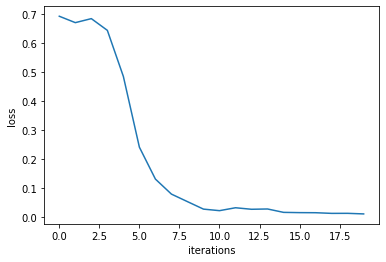

Train Accuracy: 99.55%
Test Accuracy: 73.76%
[[522 115]
 [117 130]]
Precision = 0.82,   Recall = 0.82    F1 = 0.82


In [52]:
# 训练模型
max_len = 50
batch_size = 500
hidden_dim = 100
params_save_path = r'emo_parms.pkl'
pred_y_test = train_model(X_train, y_train, X_test, y_test, word_to_vec, word_to_index, params_save_path,
                    max_len=max_len, batch_size=batch_size, hidden_dim=hidden_dim, lr=0.002, epochs=20) 
confuse_matrix(y_test, pred_y_test)

In [18]:
model = EmotionModel(word_to_vec, word_to_index, max_len, hidden_dim)
model.load_state_dict(torch.load(params_save_path))
model.eval()

EmotionModel(
  (embedding): Embedding(20195, 100)
  (lstm1): LSTM(100, 100, batch_first=True)
  (dropout1): Dropout(p=0.5, inplace=False)
  (lstm2): LSTM(100, 100, batch_first=True)
  (dropout2): Dropout(p=0.5, inplace=False)
  (linear): Linear(in_features=5000, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [48]:
def predict(str):
    sentence = str
    sentence = drop_stop_words_1(r'stop_words.txt',split_text(drop_non_chinese(sentence)))
#     print(sentence)
    pre_sen = []
    pre_sen.append(sentence)
    pre_sen = np.array(pre_sen)
#     print(pre_sen)
    test_review_indice = text_to_index(pre_sen, word_to_index, max_len=max_len)
    output = model(torch.from_numpy(test_review_indice).float())
#     print(output)
    pred = np.squeeze(np.round(output.data.numpy()).astype(int))
#     print(pred)
    print("----------------------")
    print('评论内容：', str)
    print('预测评分：', ('4星以下' if output.item() <= 0.5 else '4星及以上'))
    print('预测情感：', ('正向' if pred == 1 else '负向'))

In [49]:
sentence1 = '虽然有巨石，实在太扯漏洞多得像筛子'
sentence2 = 'AWOSOME！看得我肾上腺激素爆发啊！！！'
sentence3 = 'FAST系列最喜欢的一季'
sentence4 = '今年最佳动作电影诞生'
sentence5 = '不爱鸡肉男不爱香车，到处找剧情bug，这电影看得累啊。'
sentence6 = '不出意外，这就是我的年度华语最佳了，无懈可击那种。'
sentence7 = '主题浮于表面…表达做作且矫情…警察局的戏份是把观众当傻逼吗…为什么要大早上来看一部青春伤痛文学式的狗血电影啊…四字dd演的倒还行'
predict(sentence1)

----------------------
评论内容： 虽然有巨石，实在太扯漏洞多得像筛子
预测评分： 4星以下
预测情感： 负向
